In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, AveragePooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import cv2

# Loading Images

In [3]:
# The folder of the dataset to use
dataset_folder = "animal_emotions_dataset/Master Folder"
train_folder = f'{dataset_folder}/train'
test_folder = f'{dataset_folder}/test'
valid_folder = f'{dataset_folder}/valid'

classes = ['Angry', 'happy', 'Other', 'Sad']

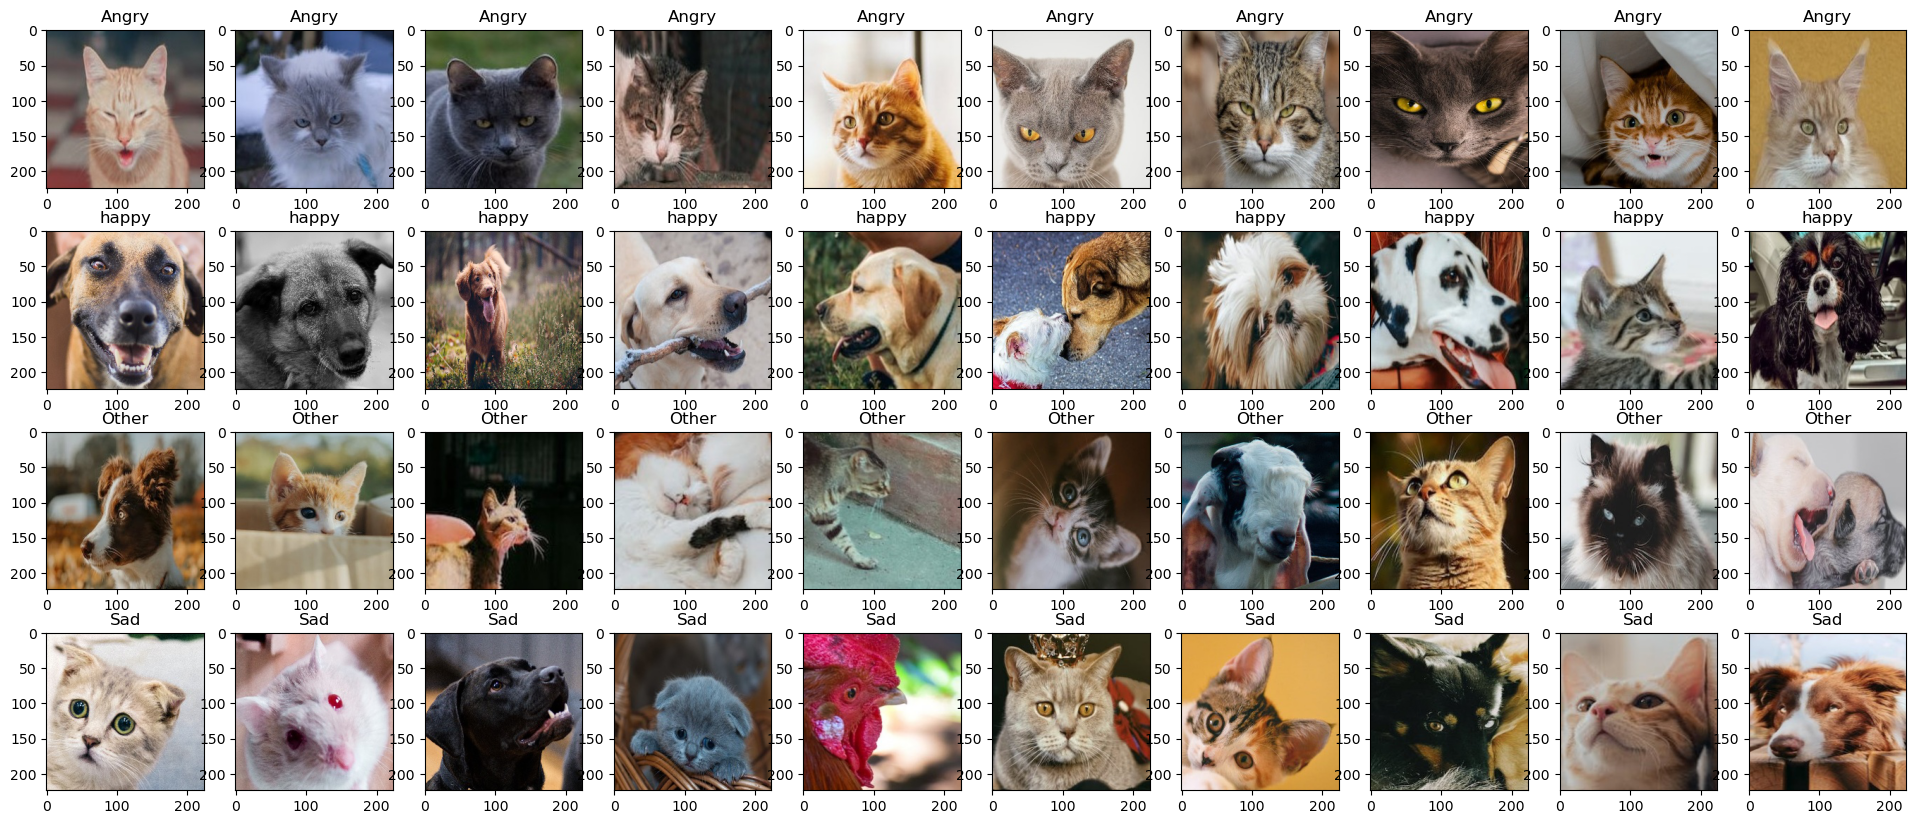

In [6]:
# Displaying Data
num_images_per_class = 10
fig, ax = plt.subplots(4, num_images_per_class, figsize=(24, 10))
for j in range(4):
    images = os.listdir(f'{train_folder}/{classes[j]}')
    for i in range(num_images_per_class):
        image = plt.imread(f'{train_folder}/{classes[j]}/{images[i]}')
        ax[j, i].set_title(classes[j])
        ax[j, i].imshow(image)

# Callbacks

In [7]:
class AccuracyStopCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') > 0.95:
            self.model.stop_training = True

# Defining Model and Data Generators

In [100]:
train_batch_size = 24
valid_batch_size = 4
train_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=0.2)
valid_gen = ImageDataGenerator(rescale=1./255)
image_size = (224, 224)
train_generator = train_gen.flow_from_directory(train_folder, batch_size=train_batch_size, target_size= image_size, class_mode= "sparse")
valid_generator = valid_gen.flow_from_directory(test_folder, batch_size=valid_batch_size, target_size= image_size, class_mode= "sparse")

Found 1000 images belonging to 4 classes.
Found 38 images belonging to 4 classes.


In [112]:
stopCallback = AccuracyStopCallback()

i = Input(shape=(image_size[0], image_size[1], 3))
x = Conv2D(32, (3, 3), activation= 'relu')(i)
x = MaxPooling2D(2, 2)(x)
x = Conv2D(32, (3, 3), activation= 'relu')(x)
x = MaxPooling2D(2, 2)(x)
x = Conv2D(32, (3, 3), activation= 'relu')(x)
x = MaxPooling2D(2, 2)(x)
x = Conv2D(32, (3, 3), activation= 'relu')(x)
x = MaxPooling2D(2, 2)(x)
x = Flatten()(x)
x = Dense(units = 64, activation= 'relu')(x)
x = Dense(units = 32, activation= 'relu')(x)
x = Dense(units = 16, activation= 'relu')(x)
x = Dense(units= 4, activation= 'softmax')(x)
model = Model(i, x)
model.compile(loss= 'sparse_categorical_crossentropy', optimizer= 'sgd', metrics=['accuracy'])
model.summary()

Model: "model_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_71 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_72 (Conv2D)          (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 54, 54, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_73 (Conv2D)          (None, 52, 52, 32)        924

# Training the Model

In [113]:
history = model.fit(train_generator, batch_size=train_batch_size, epochs= 100, validation_data= valid_generator, validation_batch_size=valid_batch_size, callbacks=[stopCallback])

Epoch 1/100
42/42 [==============================] - 5s 75ms/step - loss: 1.3870 - accuracy: 0.2340 - val_loss: 1.3874 - val_accuracy: 0.2895
Epoch 2/100
42/42 [==============================] - 3s 60ms/step - loss: 1.3834 - accuracy: 0.2780 - val_loss: 1.3845 - val_accuracy: 0.2895
Epoch 3/100
42/42 [==============================] - 3s 63ms/step - loss: 1.3810 - accuracy: 0.2990 - val_loss: 1.3927 - val_accuracy: 0.1316
Epoch 4/100
42/42 [==============================] - 3s 64ms/step - loss: 1.3788 - accuracy: 0.3030 - val_loss: 1.3892 - val_accuracy: 0.2368
Epoch 5/100
42/42 [==============================] - 3s 60ms/step - loss: 1.3732 - accuracy: 0.3140 - val_loss: 1.3979 - val_accuracy: 0.2368
Epoch 6/100
42/42 [==============================] - 2s 50ms/step - loss: 1.3678 - accuracy: 0.3140 - val_loss: 1.3866 - val_accuracy: 0.2895
Epoch 7/100
42/42 [==============================] - 3s 69ms/step - loss: 1.3602 - accuracy: 0.3420 - val_loss: 1.3957 - val_accuracy: 0.3684
Epoch 

In [103]:
# Evaluating Model
model.evaluate(valid_generator)

10/10 [==============================] - 0s 30ms/step - loss: 4.6850 - accuracy: 0.3947


[4.685027599334717, 0.3947368562221527]

# Displaying Charts

Text(0, 0.5, 'Loss')

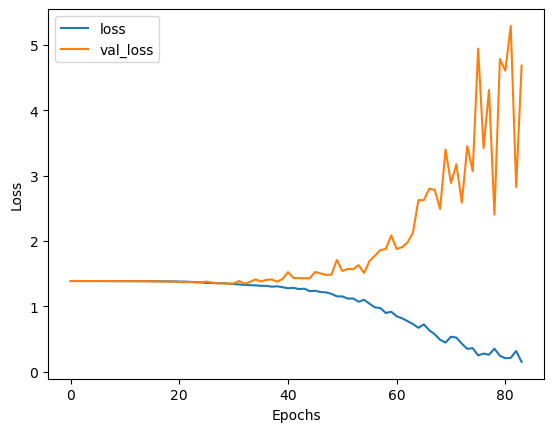

In [104]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

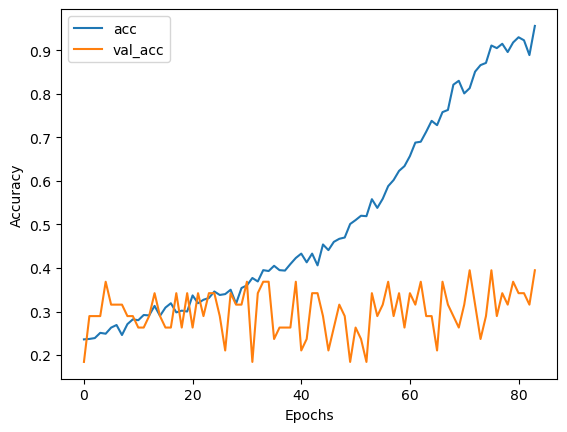

In [105]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Displaying Intermediate Representations

Angry


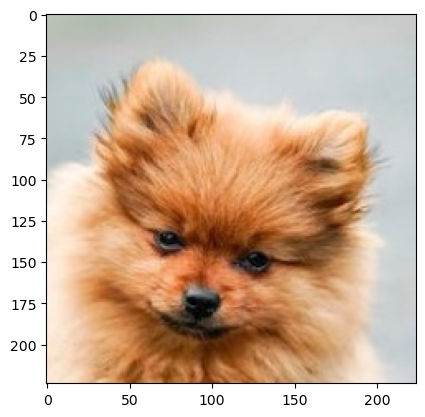

In [106]:
img_index = 3
class_index = 0
folder = valid_folder
print(classes[class_index])
valid_images = os.listdir(f'{folder}/{classes[class_index]}')
image = plt.imread(f'{folder}/{classes[class_index]}/{valid_images[img_index]}')
plt.imshow(image)

1/1 [==============================] - 1s 525ms/step


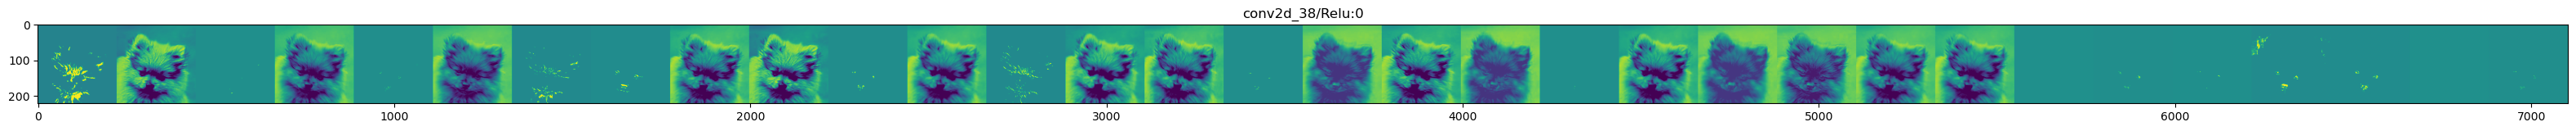

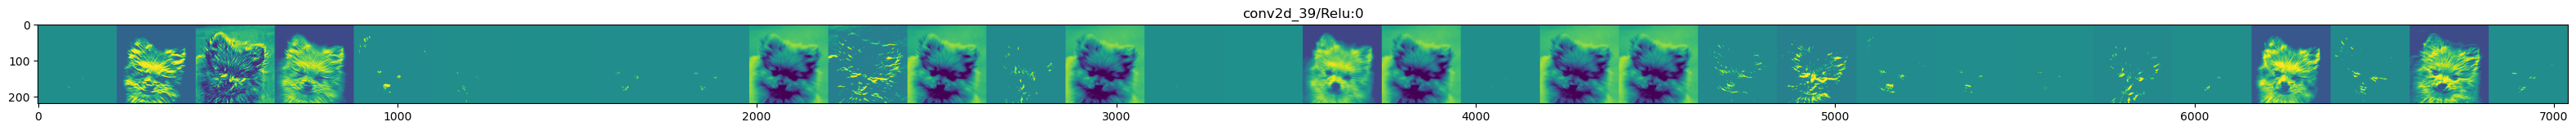

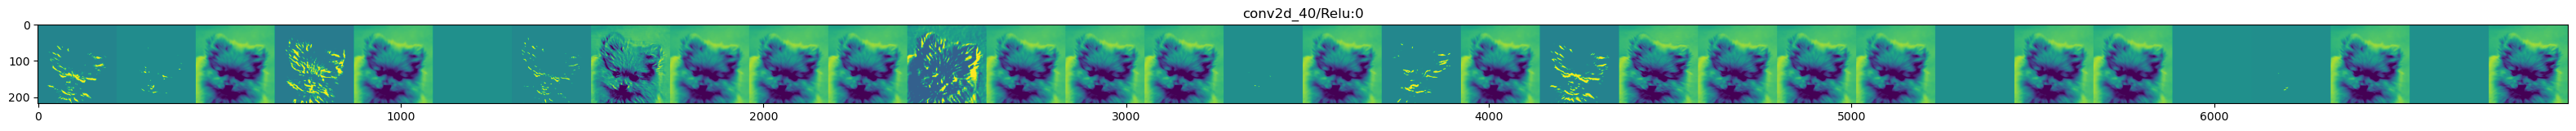

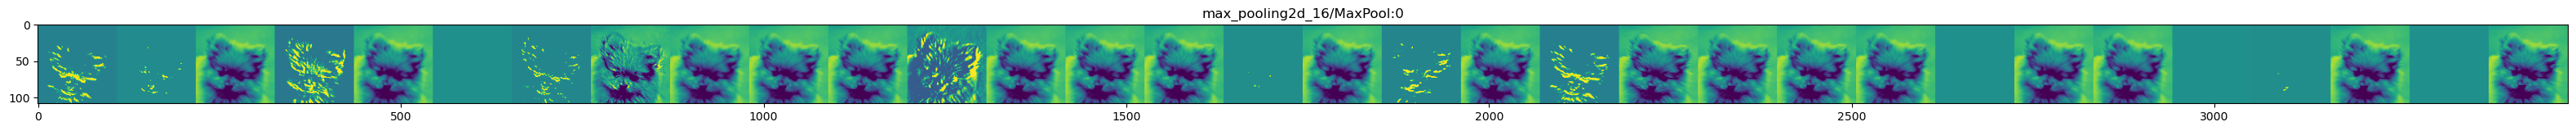

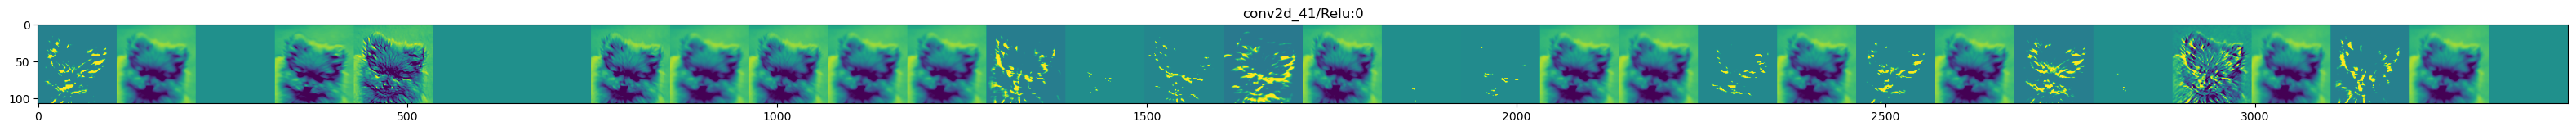

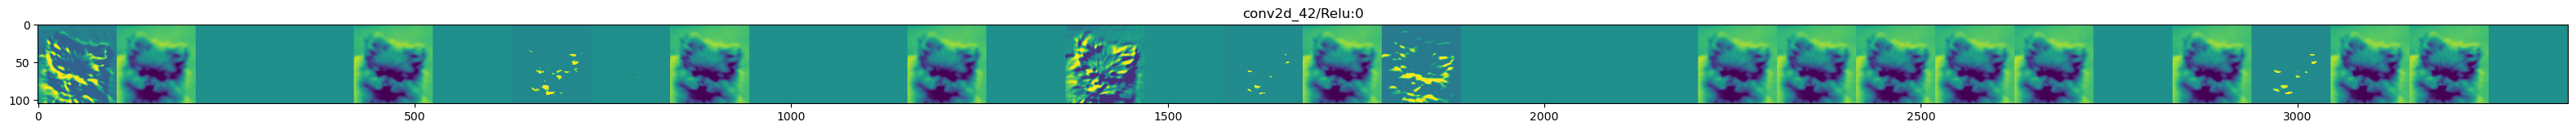

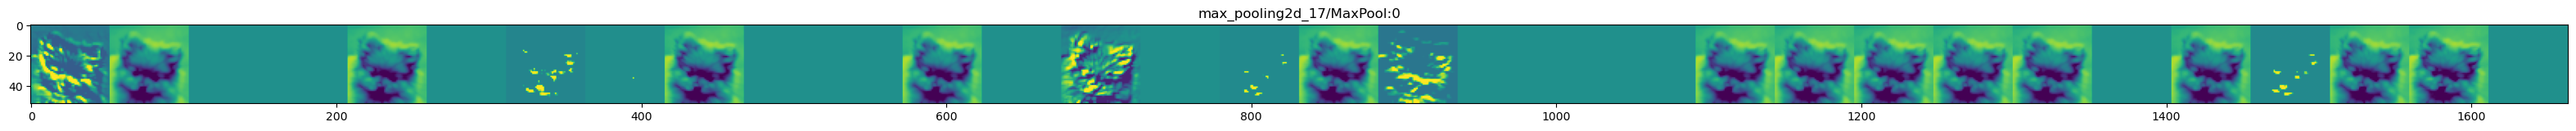

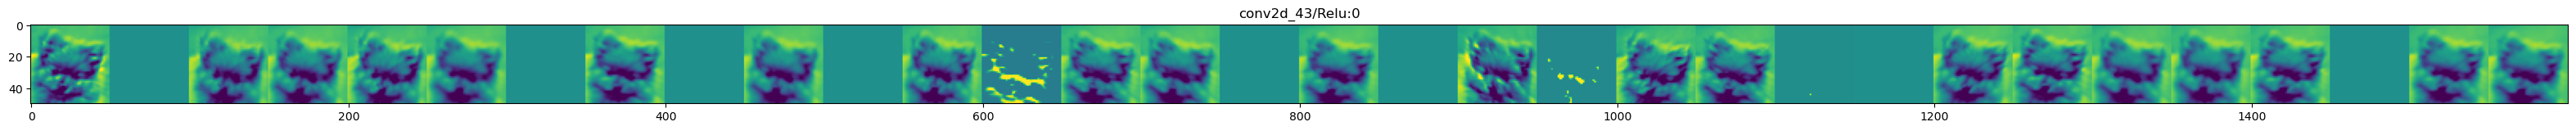

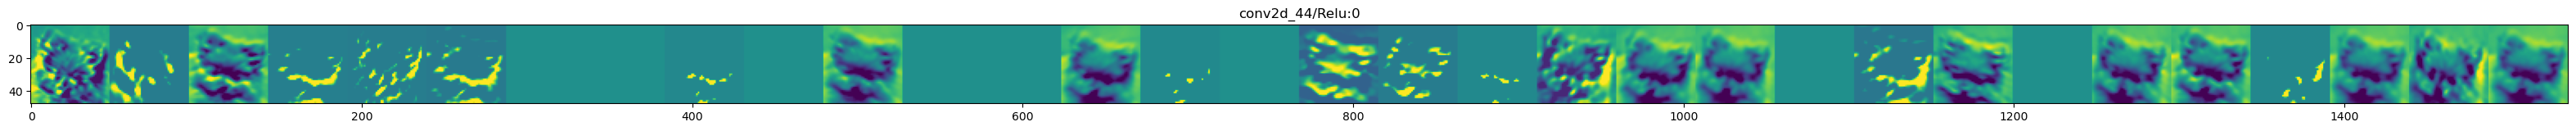

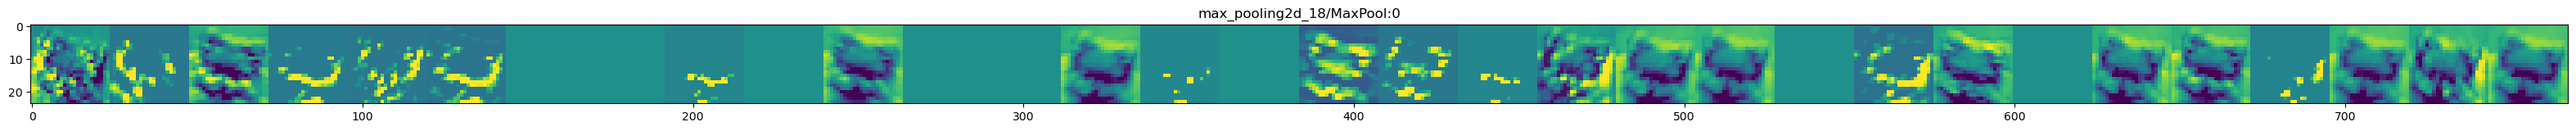

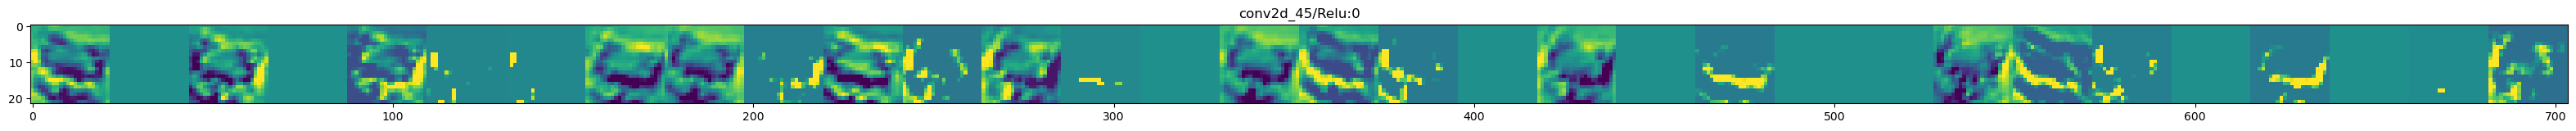

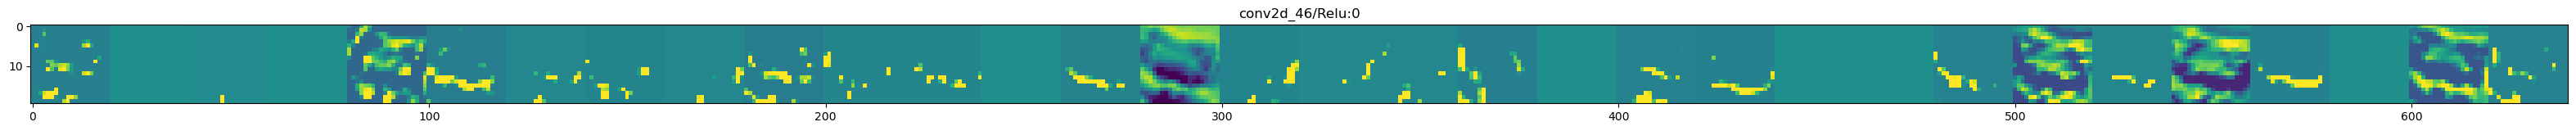

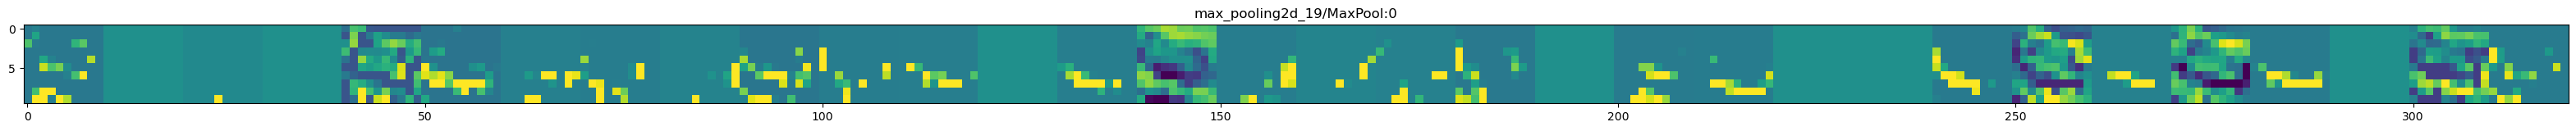

In [107]:
successive_outputs = [layer.output for layer in model.layers[1:]]
visulization_model = Model(model.input, successive_outputs)

check_set = np.reshape(image, (-1, image_size[0], image_size[1], 3))

feature_maps = visulization_model.predict(check_set)
layer_names = [layer.name for layer in successive_outputs]

for layer_name, feature_map in zip(layer_names, feature_maps):
    if len(feature_map.shape) == 4:
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in feature map

        # The feature map has shape (1, size, size, n_features)
        size = feature_map.shape[1]
        
        # Tile the images in this matrix
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            std = x.std()
            if std > 0:
                x /= std
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            
            # Tile each filter into this big horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x
        
        # Display the grid
        scale = 40. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')